In [1]:
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement

In [7]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [8]:
Station = Base.classes.station

In [9]:
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [10]:
session = Session(engine)

In [11]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [12]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# 2017 august 23 this is our last date that showed up
lastDayInDb = dt.date(2017,8,23)
lastDayMinusOneYear = lastDayInDb - dt.timedelta(days=365)
lastDayMinusOneYear.day

23

In [14]:
lastYearsResults = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >=lastDayMinusOneYear).all()

In [15]:
lastYearsResults

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
df = pd.DataFrame(lastYearsResults, columns=['date','prcp'])

In [17]:
df_sorted = df.sort_values("date")

In [18]:
df_sorted

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


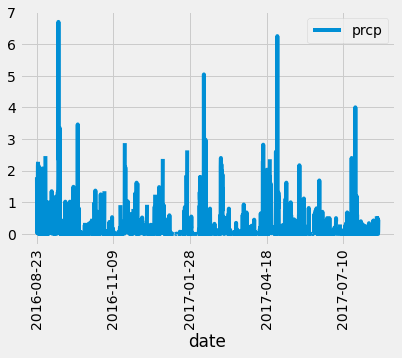

In [19]:
df_sorted.plot(x='date', y='prcp', rot=90)
plt.savefig("Precipitation_Analysis_1.jpg")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sorted.agg({"prcp" :["mean", "median", "var","std", "sem"]})

,prcp
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


In [21]:
# Design a query to show how many stations are available in this dataset
session.query(Measurement.station).distinct().count()

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationcount = session.query(Measurement.station, Station.name, func.count(Station.station)).\
   filter(Measurement.station==Station.station).group_by(Station.station).order_by(func.count(Station.station).desc()).all()
pd.DataFrame(stationcount, columns=["station ID", "station name", " number of rows"])

,station ID,station name,number of rows
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Waihee = session.query(Station.name, func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == Station.station, Station.station=="USC00519281").all()
Waihee_df= pd.DataFrame(Waihee, columns = ["station", "low temp", "high temp", "avg temp"])
Waihee_df

,station,low temp,high temp,avg temp
0,"WAIHEE 837.5, HI US",54.0,85.0,71.663781


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, func.count(Measurement.tobs)).order_by(func.count(Measurement.tobs).desc()).first()

('USC00519397', 19550)

In [25]:
Waikiki= session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station=="USC00519397", Measurement.date >=lastDayMinusOneYear)
Waikiki_df = pd.DataFrame(Waikiki, columns=["date", "temperature"])

Waikiki_df

,date,temperature
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0
...,...,...
356,2017-08-19,79.0
357,2017-08-20,81.0
358,2017-08-21,81.0
359,2017-08-22,82.0


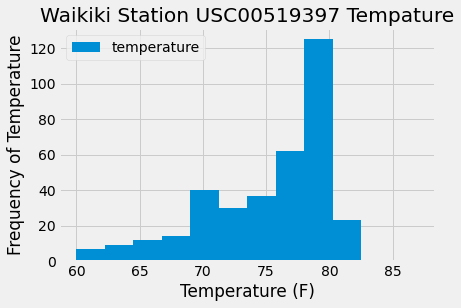

In [26]:
Waikiki_df.plot(kind = "hist", bins = 12, title = "Waikiki Station USC00519397 Tempature")
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
plt.savefig("Temperature_Analysis_2.jpg")
plt.show()

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temps = calc_temps('2017-02-28', '2017-03-05')
trip_temps

[(64.0, 72.02777777777777, 78.0)]

In [30]:
tmin = trip_temps[0][0]
tave = trip_temps[0][1]
tmax = trip_temps[0][2]
print(tmin, tave, tmax)

64.0 72.02777777777777 78.0


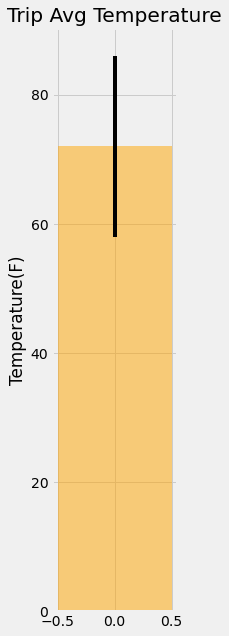

In [31]:
y_err = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0,tave,yerr=y_err,align="center",width=1,color="orange",alpha=0.5)
plt.ylim=(0,120)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temperature")
plt.savefig("Trip_Avg_Temp_Analysis_3.jpg")
plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-02-28'
end_date = '2012-03-05'
Results = session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>=start_date).filter(Measurement.date<=end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")
for each in Results: print(each[0],"\t",each[1])         

Station Id	Total Rainfall
USC00519281 	 11.08
USC00516128 	 10.32
USC00513117 	 5.79
USC00518838 	 3.8400000000000003
USC00519523 	 2.92
USC00519397 	 1.1800000000000002
USC00511918 	 0.76
USC00514830 	 0.03
USC00517948 	 0.0


In [33]:
sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>=start_date).filter(Measurement.date<=end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# print("Station\t\tStation_Name\t\tRainfall\tLatitude\tLongitude\tTemperature\tElevation")
# for result in Results: print(result[0],"\t",result[1],"\t",result[2],"\t\t",result[3],"\t",result[4],"\t",result[5])

for result in Results: print(result)

('USC00519281', 'WAIHEE 837.5, HI US', 11.08, 21.45167, -157.84888999999998, 32.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 10.32, 21.3331, -157.8025, 152.4)
('USC00513117', 'KANEOHE 838.1, HI US', 5.79, 21.4234, -157.8015, 14.6)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 3.8400000000000003, 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2.92, 21.33556, -157.71139, 19.5)
('USC00519397', 'WAIKIKI 717.2, HI US', 1.1800000000000002, 21.2716, -157.8168, 3.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.76, 21.3152, -157.9992, 0.9)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.03, 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9)


In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_start_date = dt.date(2017, 1 ,1)
trip_end_date = dt.date(2017, 1 ,7)

# Set the start and end date of the trip
start = dt.datetime.strftime(trip_start_date, "%m-%d")
end = dt.datetime.strftime(trip_end_date, "%m-%d")

# Convert from string to datetime object.
start = dt.datetime.strptime(start, "%m-%d")
end = dt.datetime.strptime(end, "%m-%d")

# Use the start and end date to create a range of dates
date_array = (start + dt.timedelta(days=x) for x in range(0, ((end-start).days) + 1))

# Stip off the year and save a list of %m-%d strings
string_date_list = []
for date_object in date_array:
    string_date = date_object.strftime("%m-%d")
    string_date_list.append(string_date)

# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals_list = []
for date in string_date_list:
    daily_normals_list.append(daily_normals(date))

min_temp_list = []
avg_temp_list = []
max_temp_list = []
print(daily_normals_list)
for daily_normals_item in daily_normals_list:
    for min_temp, avg_temp, max_temp in daily_normals_item:
        min_temp_list.append(min_temp)
        avg_temp_list.append(avg_temp)
        max_temp_list.append(max_temp)

[[(62.0, 69.15384615384616, 77.0)], [(60.0, 69.39622641509433, 77.0)], [(62.0, 68.9090909090909, 77.0)], [(58.0, 70.0, 76.0)], [(56.0, 67.96428571428571, 76.0)], [(61.0, 68.96491228070175, 76.0)], [(57.0, 68.54385964912281, 76.0)]]


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame({
    "trip_dates": string_date_list,
    "tmin": min_temp_list,
    "tavg": avg_temp_list,
    "tmax": max_temp_list
})

daily_normals_df = daily_normals_df.set_index("trip_dates")

daily_normals_df

,tmin,tavg,tmax
trip_dates,,,
01-01,62.0,69.153846,77.0
01-02,60.0,69.396226,77.0
01-03,62.0,68.909091,77.0
01-04,58.0,70.000000,76.0
01-05,56.0,67.964286,76.0
01-06,61.0,68.964912,76.0
01-07,57.0,68.543860,76.0


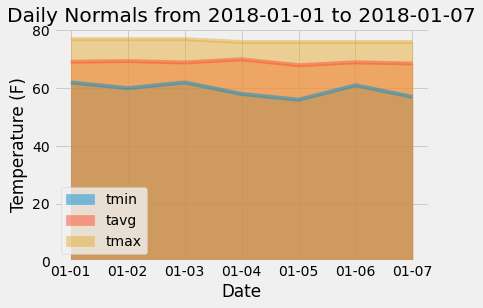

In [37]:
# Plot the daily normals as an area plot with `stacked=False`
ax = daily_normals_df.plot.area(stacked=False)
trip_start = trip_start_date.replace(year = trip_start_date.year + 1)
trip_end = trip_end_date.replace(year = trip_end_date.year + 1)
ax.set_title(f"Daily Normals from {trip_start} to {trip_end}")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (F)")
fig = ax.get_figure()
fig.savefig("daily_normals_area_chart.jpg")

In [38]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
avg_june_temp_tuple_list = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "06").all()

average_june_temp = list(np.ravel(avg_june_temp_tuple_list))[0]

# Identify the average temperature in December at all stations across all available years in the dataset. 
avg_december_temp_tuple_list = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "12").all()

average_december_temp = list(np.ravel(avg_december_temp_tuple_list))[0]

print(f"The average temperature in June at all stations across all available years in the dataset is {average_june_temp} F.")
print(f"The average temperature in December at all stations across all available years in the dataset is {average_december_temp} F.")

The average temperature in June at all stations across all available years in the dataset is 74.94411764705882 F.
The average temperature in December at all stations across all available years in the dataset is 71.04152933421226 F.


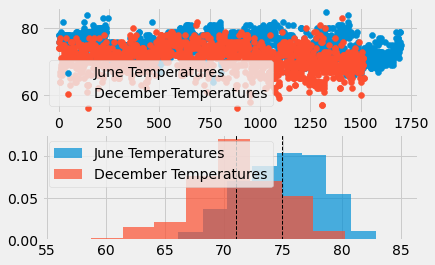

In [39]:
june_temp_tuple_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "06").all()

june_temp_list = list(np.ravel(june_temp_tuple_list))

# Remove nulls (if any)
clean_june_temp_list = []
for temp in june_temp_list: 
    if temp != None : 
        clean_june_temp_list.append(temp)

dec_temp_tuple_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "12").all()

dec_temp_list = list(np.ravel(dec_temp_tuple_list))

# Remove nulls (if any)
clean_dec_temp_list = []
for temp in dec_temp_list: 
    if temp != None : 
        clean_dec_temp_list.append(temp)
    
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(clean_june_temp_list)), clean_june_temp_list, label="June Temperatures")
plt.scatter(range(len(clean_dec_temp_list)), clean_dec_temp_list, label="December Temperatures")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(clean_june_temp_list, 10, density=True, alpha=0.7, label="June Temperatures")
plt.hist(clean_dec_temp_list, 10, density=True, alpha=0.7, label="December Temperatures")
plt.axvline(np.mean(clean_june_temp_list), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(clean_dec_temp_list), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.savefig("june_december_scatterplot_histogram.jpg")

In [40]:
from scipy import stats
stats.ttest_ind(june_temp_list, dec_temp_list, equal_var=False)
# Independent t-test comparing the means of 2 independent populations
# It is a statistically significant difference in means (p-value of less than 0.05).
# Very small value - means of these two populations are significantly different.
# lower probability that the difference is random.
# Reject the null hypothesis.
# null hypothesis - there is no meaningful difference between the temperature in June and December in Hawaii.

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)